In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/0.MKCE/Datasets/Social_Network_Ads.csv")

In [10]:
print(df)

      User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]


In [13]:
df=pd.get_dummies(df)

In [15]:
x=df.drop(['Purchased'], axis=1)

In [16]:
y=df['Purchased'].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25,random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
y_pred=classifier.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy_score(y_test, y_pred)

0.93

In [35]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]])

In [37]:
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [39]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [44]:
y_proba=classifier.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.2 0.  0.  0.  0.  0.  0.  1.  0.  0.8 0.  0.  0.2 0.2 0.  0.6 0.4 0.
 0.9 0.1 0.  1.  0.  1.  0.  1.  0.2 0.  0.  0.2 0.2 0.  1.  0.  0.  0.
 0.  0.  0.  1.  0.1 0.  0.  0.  0.7 0.  0.3 0.8 0.1 0.8 1.  0.  0.  0.8
 1.  0.8 0.  0.  0.9 0.  0.  0.8 0.  1.  0.  0.9 0.1 0.  0.  0.2 1.  0.
 0.1 0.8 0.1 0.  0.  0.  1.  0.7 0.9 1.  0.  0.  1.  0.1 0.1 0.9 0.7 0.
 0.1 0.9 0.  0.1 0.  0.5 0.1 0.8 0.9 1. ]


In [46]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [49]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.953125


Text(0, 0.5, 'True')

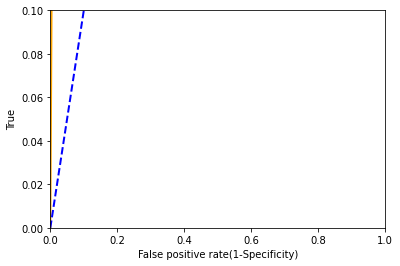

In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange', lw=2,label='ROC curve(area under curve=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,0.1])
plt.xlabel("False positive rate(1-Specificity)")
plt.ylabel("True")